**Title: Predicting Heart Disease using Classification**

- **Introduction:**
Heart disease is a major cause of morbidity and mortality worldwide. Early detection and diagnosis of heart disease can help prevent complications and improve outcomes. The goal of this project is to build a classification model to predict the presence or absence of heart disease based on several clinical and demographic features. 

- **Question:**
Can we predict the presence or absence of heart disease using classification based on clinical and demographic features provided in the dataset?

- **Dataset:**
We will be using the Heart Disease dataset that combines the four datasets obtained from the UCI Machine Learning Repository: the heart disease datasets from Cleveland, Hungary, Switzerland, and Long Beach V. It contains data from 1026 patients with 14 clinical and demographic features, including age, sex, chest pain type, resting blood pressure, cholesterol levels, maximum heart rate achieved during exercise, and the presence or absence of heart disease.

- **Preliminary Exploratory Data Analysis:**
We will begin by loading the dataset into R and performing some preliminary exploratory data analysis. We will check for missing values, convert any categorical variables to factors, and ensure that the data is in a tidy format.

  Using only the training data, we will create a summary table to report the number of observations or models  in each class,     the means of the predictor variables we plan to use in our analysis. We will also create at least one visualization of the     data, such as a histogram or scatterplot, to explore the relationships between the variables.

- **Methods:**
We will use classification methods to build a model that can predict the presence or absence of heart disease based on the clinical and demographic features in the dataset. 

  To visualize the results, we will create confusion matrices to evaluate the model's performance on the training and test       datasets. We will also calculate metrics such as accuracy to compare the performance of different models.

- **Expected Outcomes and Significance:**
We expect to find that we can accurately predict the presence or absence of heart disease using classification based on clinical and demographic features. This model could be used as a tool to assist healthcare providers in identifying patients at risk of heart disease and implementing appropriate preventative measures.

  Such findings could have a significant impact on public health by improving early detection and management of heart disease,   reducing the burden of morbidity and mortality associated with this condition. Future questions could explore the use of       additional features, such as genetic markers or lifestyle factors, to improve the accuracy of the model.

**Columns Explaining**

+ `age`: Age (in years)
+ `sex`: Sexuality (1 = male; 0 = female)
+ `cp`: chest pain type (4 values: 1 = typical angina, 2 = atypical angina, 3 = non-angina pain, 4 = asymptomatic angina)
+ `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
+ `chol`: serum cholestoral in mg/dl
+ `fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
+ `restecg`: resting electrocardiographic results (values 0,1,2)
+ `thalach`: maximum heart rate achieved
+ `exang`: exercise induced angina (1 = yes; 0 = no)
+ `oldpeak`: ST depression induced by exercise relative to rest
+ `slope`: the slope of the peak exercise ST segment
+ `ca`: number of major vessels (0-4) colored by flourosopy
+ `thal`: 1 = normal; 2 = fixed defect; 3 = reversable defect
+ `target`: (0 = no heart disease, 1 = has heart disease)
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


In [ ]:
library(dplyr)
library(rsample)
library(caret)
library(ggplot2)
library(tidyverse)

In [3]:

heart_dataset_csv <- read_csv("heart.csv") %>%
    mutate(sex = case_when(sex == 1 ~ "male",
                           sex == 0 ~ "female"))

heart_dataset_split <- initial_split(heart_dataset_csv, prop = 0.75, strata = target)

heart_dataset <- training(heart_dataset_split)
heart_dataset_testing <- testing(heart_dataset_split)


mode_func <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

result <- aggregate(heart_dataset$cp, list(heart_dataset$sex), mode_func)
colnames(result) <- c("sex", "mode")

results <- aggregate(heart_dataset$exang, list(heart_dataset$sex), mode_func)
colnames(results) <- c("sex", "exang")

resultfbs <- aggregate(heart_dataset$fbs, list(heart_dataset$sex), mode_func)
colnames(resultfbs) <- c("sex", "fbs")

resultca <- aggregate(heart_dataset$ca, list(heart_dataset$sex), mode_func)
colnames(resultca) <- c("sex", "ca")

resultecg <- aggregate(heart_dataset$restecg, list(heart_dataset$sex), mode_func)
colnames(resultecg) <- c("sex", "restecg")

resultthal <- aggregate(heart_dataset$thal, list(heart_dataset$sex), mode_func)
colnames(resultthal) <- c("sex", "thal")



heart_dataset_stats <- heart_dataset %>%
    mutate(sex = as_factor(sex)) %>%
    group_by(sex) %>%
    summarize(count = n(),
             mean_age = mean(age),
             mean_cholestrol_level = mean(chol),
             mean_resting_bp = mean(trestbps),
             mean_max_heart_rate = mean(thalach),
             average_ST_depression = mean(oldpeak)) %>%
    mutate(mode_of_cp = (result$mode),
          mode_of_exang = (results$exang),
          mode_of_ca = (resultca$ca),
          mode_of_restecg = (resultecg$restecg),
          mode_of_fbs = (resultfbs$fbs),
          mode_of_thal = (resultthal$thal)) %>%
    select(sex, count, mean_age, mode_of_cp, mean_resting_bp, mean_cholestrol_level,
           mode_of_fbs, mode_of_restecg, mean_max_heart_rate, mode_of_exang, average_ST_depression,
           mode_of_ca, mode_of_thal)
           


heart_dataset_stats



Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,count,mean_age,mode_of_cp,mean_resting_bp,mean_cholestrol_level,mode_of_fbs,mode_of_restecg,mean_max_heart_rate,mode_of_exang,average_ST_depression,mode_of_ca,mode_of_thal
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
male,544,53.72978,0,130.5331,238.9044,0,1,148.4283,0,1.1621324,0,2
female,224,56.37946,0,133.6071,260.7054,0,1,150.1607,0,0.9776786,0,3


`summarise()` has grouped output by 'sex', 'age'. You can override using the
`.groups` argument.
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


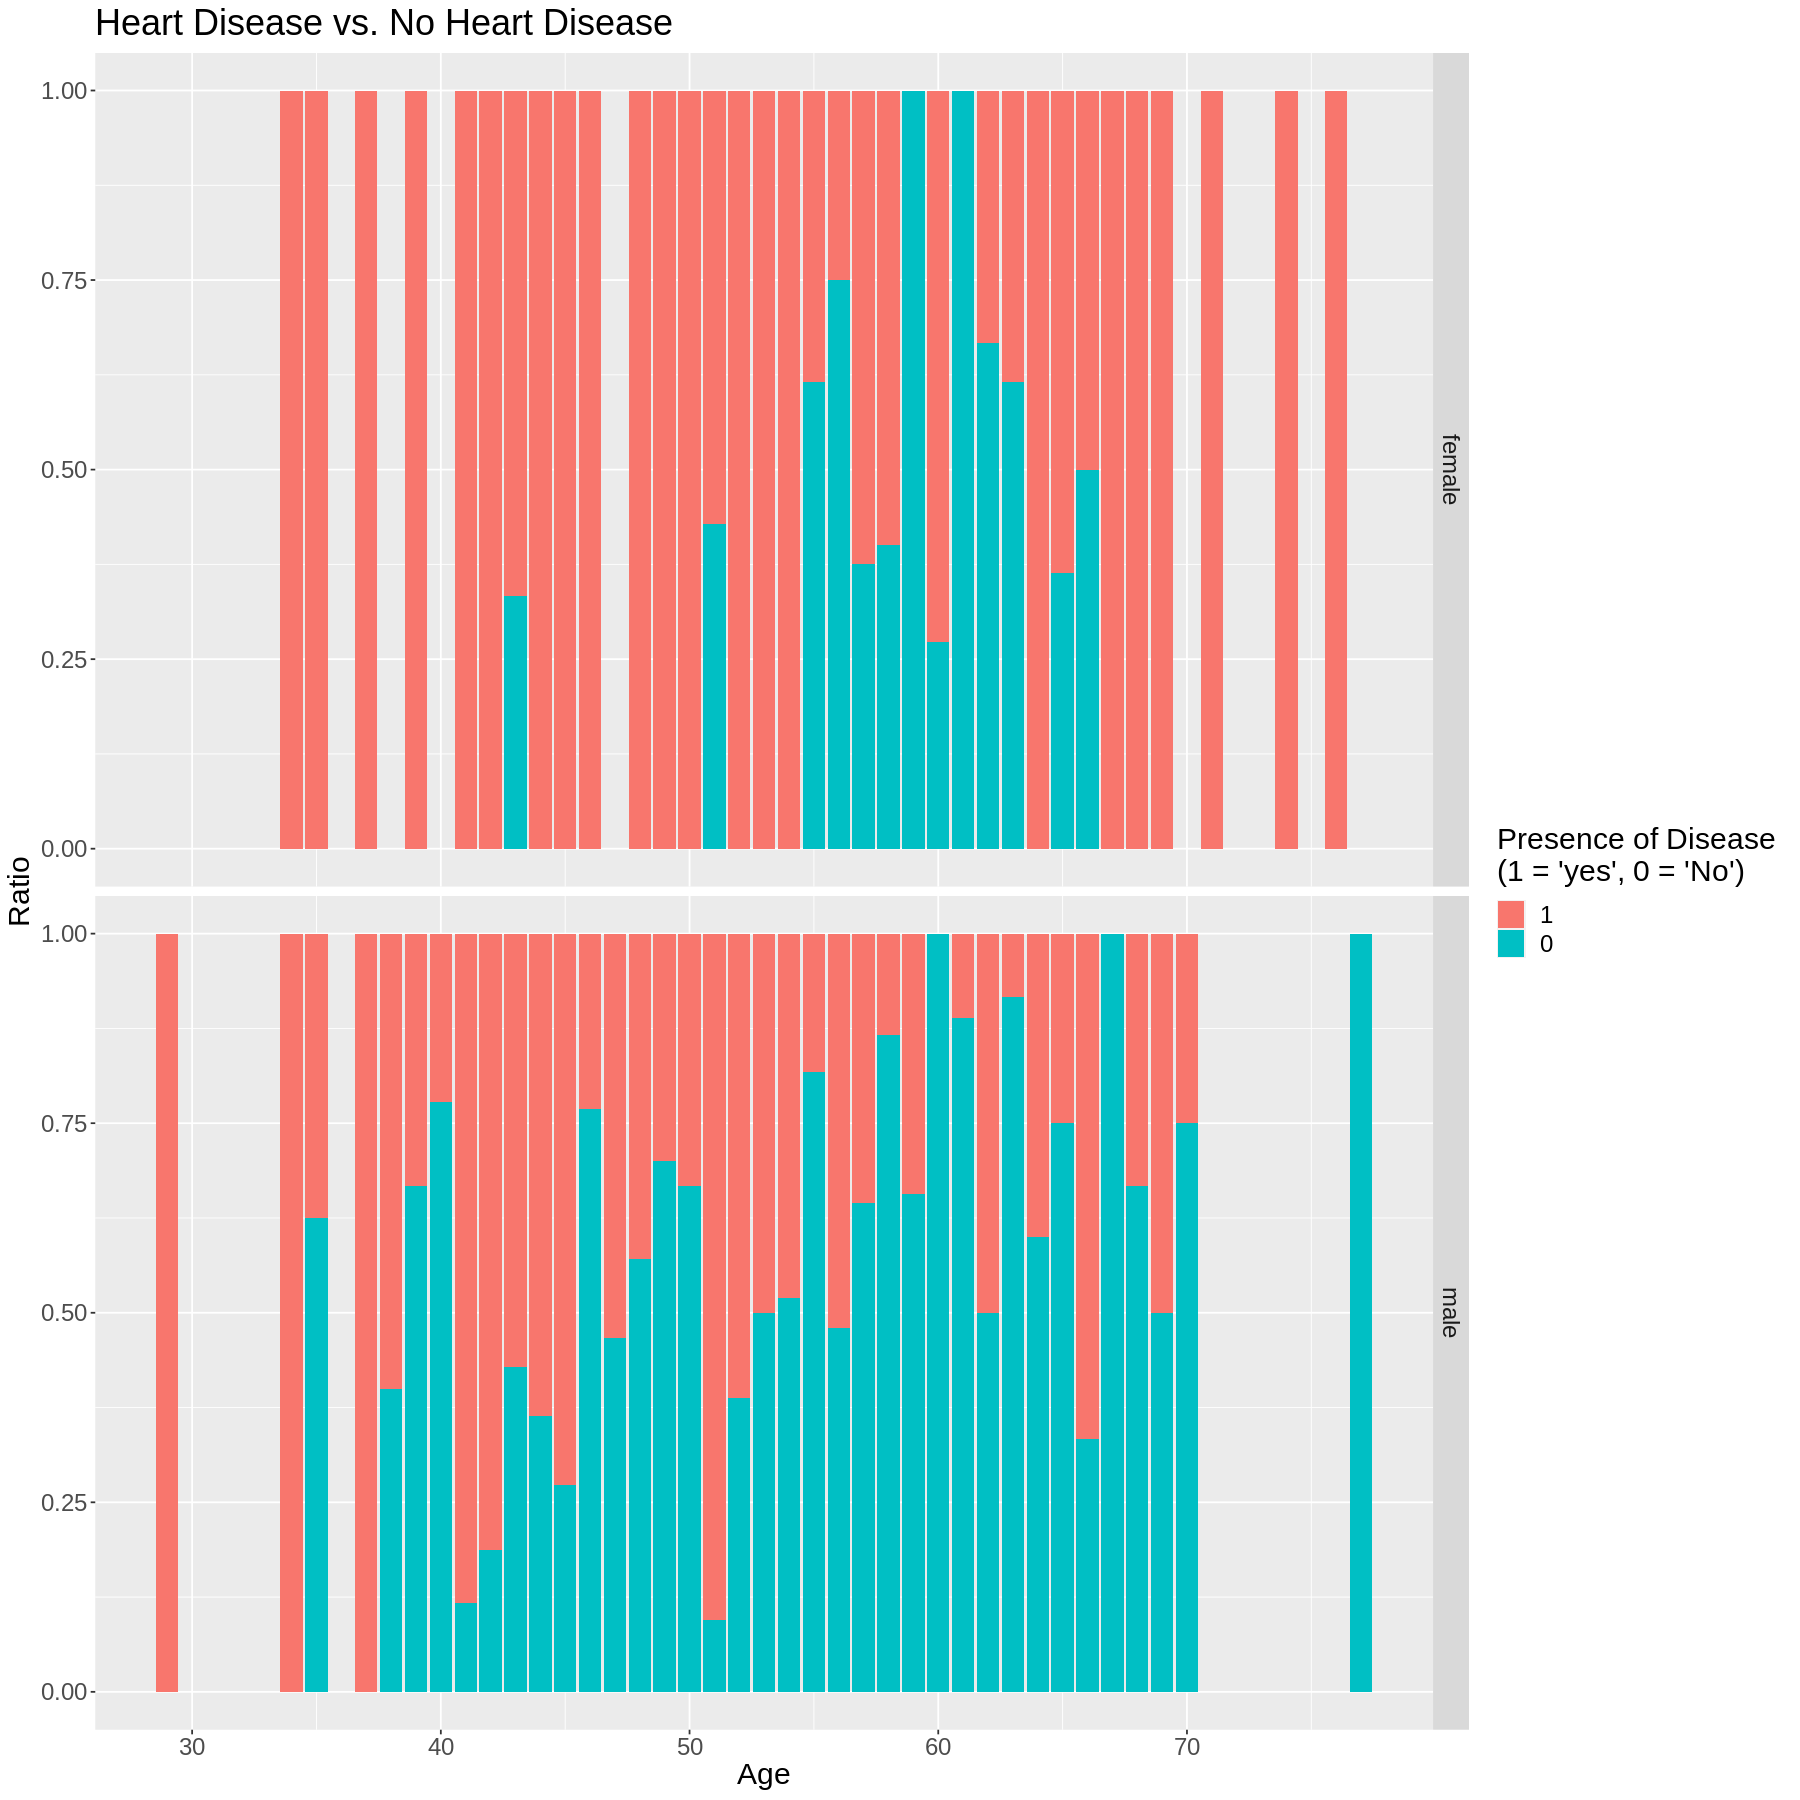

In [20]:
options(repr.plot.height = 15, repr.plot.width = 15)

temp_set <- heart_dataset |>
    group_by(sex, age, target) |>
    summarise(count = n()) |>
    mutate(target = as_factor(target))

heart_plot <- temp_set |>
    ggplot(aes(x = age, y = count, fill = target)) +
    geom_histogram(stat = "identity", position = "fill", binwidth = 10) +
    facet_grid(rows = vars(sex)) +
    labs(y = "Ratio", x = "Age", fill = "Presence of Disease \n(1 = 'yes', 0 = 'No')") + 
    ggtitle("Heart Disease vs. No Heart Disease") + 
    theme(text = element_text(size = 18)) 
    

heart_plot